# Exploratory Data Analysis (EDA) - Step by Step
## E-Commerce Data Analysis

This notebook provides a comprehensive, step-by-step analysis of the dataset.

## 1. Import Libraries

In [89]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
import warnings
from datetime import datetime

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


## 2. Load Data

In [90]:
# Load the Excel file
file_path = '/kaggle/input/eda-exploratory-analysis/Data Analysis.xlsx'  # Update this path if needed

# Check available sheets
xl_file = pd.ExcelFile(file_path)
print(f"Available sheets: {xl_file.sheet_names}")

# Load the first sheet
df = pd.read_excel(file_path, sheet_name=xl_file.sheet_names[0])

print(f"\n✓ Data loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")

Available sheets: ['Sheet2', 'Sheet3']

✓ Data loaded successfully!
Shape: 345 rows × 37 columns


## 3. First Look at the Data

In [91]:
# Display first few rows
df.head()

,Order ID,Order Check,Order Date,Order Month,Order Week,Customer ID,Type,SKU,Category,Product Name,...,Status,Return?,Reason,Ret Rec,Del vs Ret Check,Ret Window,Order Vs Return Date Check,No. Of Days To Delivery,Refund,Comments
0,UT-100001,UT,2024-01-10 00:00:00,10,40,CUST_10001,New,TOP-CAS-M,Tops,Classic Cotton Tee,...,Delivered,No,NaN,NaN,NaN,NaN,NaN,4.0,Not Applicable,Customer came a second time but still marked a...
1,UT-100005,UT,2024-01-10 00:00:00,10,40,CUST_10001,New,ACC-SCF-OS,Accessories,Silk Scarf,...,Delivered,No,NaN,NaN,NaN,NaN,NaN,5.0,Not Applicable,Customer came a second time but still marked a...
2,UT-100002,UT,2024-01-10 00:00:00,10,40,CUST_10002,Returning,DRS-FRM-S,Dresses,Floral Midi Dress,...,Delivered,Yes,Size Issue,15/10/2024,1.0,11.0,0.0,3.0,Processed,NaN
3,UT-100004,UT,2024-01-10 00:00:00,10,40,CUST_10004,New,OUT-JKT-XL,Outerwear,Denim Jacket,...,Delivered,Yes,Quality Defect,20/10/2024,1.0,12.0,0.0,7.0,Processed,NaN
4,UT-100006,UT,2024-02-10 00:00:00,10,40,CUST_10005,Returning,TOP-FRM-S,Tops,Printed Blouse,...,Delivered,Yes,Changed Mind,18/10/2024,1.0,11.0,0.0,5.0,Processed,NaN


In [92]:
# Display last few rows
df.tail()

,Order ID,Order Check,Order Date,Order Month,Order Week,Customer ID,Type,SKU,Category,Product Name,...,Status,Return?,Reason,Ret Rec,Del vs Ret Check,Ret Window,Order Vs Return Date Check,No. Of Days To Delivery,Refund,Comments
340,UT-100342,UT,30/12/2024,12,53,CUST_10341,New,BOT-NEW-S,Bottoms,New Beginning Pants,...,Delivered,No,NaN,NaN,NaN,NaN,NaN,27.0,Not Applicable,NaN
341,UT-100343,UT,30/12/2024,12,53,CUST_10342,New,OUT-FRE-M,Outerwear,Fresh Start Jacket,...,Delivered,Yes,Wrong Item,24/2/2025,1.0,28.0,0.0,28.0,Processed,NaN
342,UT-100344,UT,30/12/2024,12,53,CUST_10343,Returning,ACC-LCK-OS,Accessories,Lucky Charm Bracelet,...,Delivered,No,NaN,NaN,NaN,NaN,NaN,27.0,Not Applicable,NaN
343,UT-100345,UT,30/12/2024,12,53,CUST_10344,New,TOP-BEG-L,Tops,Begin Again Top,...,Delivered,Yes,Damaged in Transit,23/2/2025,1.0,27.0,0.0,28.0,Processed,NaN
344,UT-100346,UT,31/12/2024,12,53,CUST_10345,New,DRS-CNT-S,Dresses,Countdown Dress,...,Delivered,Yes,Size Issue,25/2/2025,1.0,28.0,0.0,28.0,Processed,NaN


In [93]:
# Display random sample
df.sample(10)

,Order ID,Order Check,Order Date,Order Month,Order Week,Customer ID,Type,SKU,Category,Product Name,...,Status,Return?,Reason,Ret Rec,Del vs Ret Check,Ret Window,Order Vs Return Date Check,No. Of Days To Delivery,Refund,Comments
24,UT-100026,UT,2024-06-10 00:00:00,10,41,CUST_10025,New,DRS-WRK-M,Dresses,Work Dress,...,Delivered,No,NaN,NaN,NaN,NaN,NaN,12.0,Not Applicable,NaN
5,UT-100007,UT,2024-02-10 00:00:00,10,40,CUST_10006,New,DRS-CAS-M,Dresses,A-Line Dress,...,Cancelled,No,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,NaN
99,UT-100101,UT,25/10/2024,10,43,CUST_10100,New,DRS-MXI-L,Dresses,Maxi Dress,...,Delivered,No,NaN,NaN,NaN,NaN,NaN,12.0,Not Applicable,NaN
232,UT-100234,UT,2024-03-12 00:00:00,12,49,CUST_10233,New,TOP-SWT-S,Tops,Cropped Sweater,...,Delivered,Yes,Size Issue,2025-03-01 00:00:00,1.0,22.0,0.0,9.0,Processed,NaN
306,UT-100308,UT,21/12/2024,12,51,CUST_10307,New,OUT-WNT-L,Outerwear,Winter Wonderland Coat,...,Delivered,Yes,Changed Mind,2025-10-02 00:00:00,1.0,28.0,0.0,23.0,Processed,NaN
97,UT-100099,UT,24/10/2024,10,43,CUST_10098,New,ACC-BLT-S,Accessories,Braided Belt,...,Delivered,No,NaN,NaN,NaN,NaN,NaN,11.0,Not Applicable,NaN
260,UT-100262,UT,2024-10-12 00:00:00,12,50,CUST_10261,New,BOT-GLM-S,Bottoms,Glam Pants,...,Delivered,No,NaN,NaN,NaN,NaN,NaN,15.0,Not Applicable,NaN
58,UT-100060,UT,15/10/2024,10,42,CUST_10059,New,BOT-CRP-S,Bottoms,Cropped Pants,...,RTO,No,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,NaN
179,UT-100181,UT,16/11/2024,11,46,CUST_10180,New,TOP-RCH-S,Tops,Rouched Top,...,Delivered,No,NaN,NaN,NaN,NaN,NaN,13.0,Not Applicable,NaN
109,UT-100111,UT,28/10/2024,10,44,CUST_10110,New,DRS-FES-M,Dresses,Festive Kurta Set,...,Delivered,Yes,Size Issue,18/11/2024,1.0,16.0,0.0,5.0,Processed,NaN


## 4. Basic Information

In [94]:
# Dataset shape
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 345
Number of columns: 37


In [95]:
# Column names
print("Column Names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

Column Names:
1. Order ID
2. Order Check
3. Order Date
4. Order Month
5. Order Week
6. Customer ID
7. Type
8. SKU
9. Category
10. Product Name
11. Unit Price
12. Qty
13. Calc Total
14. Total
15. Calculated vs Given Total Check
16. Discount Code
17. Discount Code %
18. Discount Integer
19. Disc %
20. Discount Check
21. Discounted Total
22. Payment
23. Source
24. City
25. State
26. Warehouse
27. Del Date
28. Status
29. Return?
30. Reason
31. Ret Rec
32. Del vs Ret Check
33. Ret Window
34. Order Vs Return Date Check
35. No. Of Days To Delivery
36. Refund
37. Comments


In [96]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Order ID                         345 non-null    object 
 1   Order Check                      345 non-null    object 
 2   Order Date                       345 non-null    object 
 3   Order Month                      345 non-null    int64  
 4   Order Week                       345 non-null    int64  
 5   Customer ID                      345 non-null    object 
 6   Type                             345 non-null    object 
 7   SKU                              345 non-null    object 
 8   Category                         345 non-null    object 
 9   Product Name                     345 non-null    object 
 10  Unit Price                       345 non-null    int64  
 11  Qty                              345 non-null    int64  
 12  Calc Total            

In [97]:
# Memory usage
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Memory usage: 0.42 MB


## 5. Missing Values Analysis

In [98]:
# Calculate missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})

# Show only columns with missing values
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_data) > 0:
    print("Columns with missing values:")
    display(missing_data)
else:
    print("✓ No missing values found!")

Columns with missing values:


,Column,Missing_Count,Missing_Percentage
Comments,Comments,339,98.26
Discount Code,Discount Code,205,59.42
Discount Integer,Discount Integer,205,59.42
Discount Code %,Discount Code %,205,59.42
Discount Check,Discount Check,205,59.42
Reason,Reason,165,47.83
Del vs Ret Check,Del vs Ret Check,165,47.83
Ret Rec,Ret Rec,165,47.83
Order Vs Return Date Check,Order Vs Return Date Check,165,47.83
Ret Window,Ret Window,165,47.83


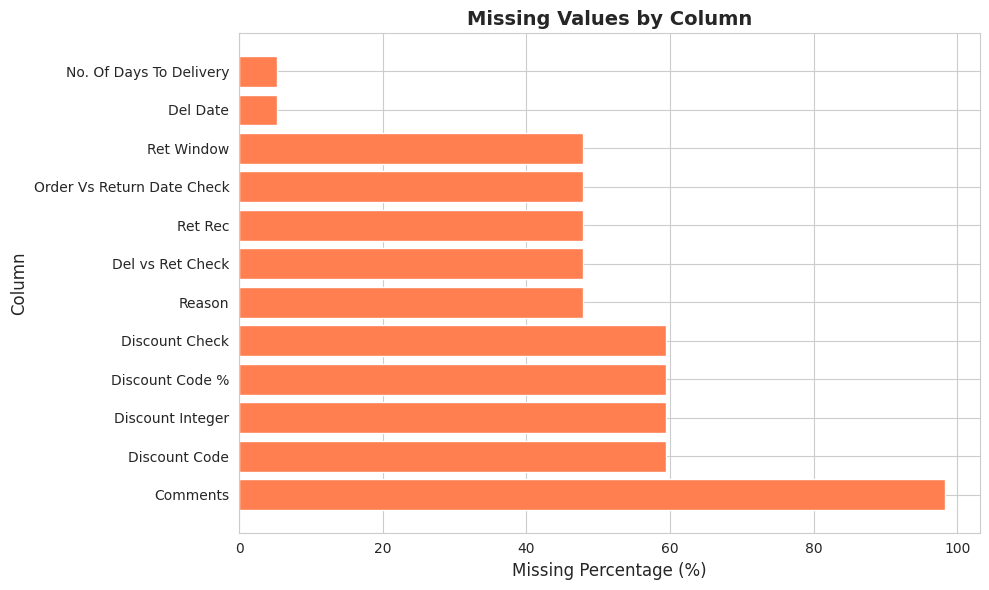

In [99]:
# Visualize missing values
if len(missing_data) > 0:
    plt.figure(figsize=(10, 6))
    plt.barh(missing_data['Column'], missing_data['Missing_Percentage'], color='coral')
    plt.xlabel('Missing Percentage (%)', fontsize=12)
    plt.ylabel('Column', fontsize=12)
    plt.title('Missing Values by Column', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

## 6. Numerical Features Analysis

In [100]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"Numerical columns ({len(numerical_cols)}):")
for col in numerical_cols:
    print(f"  • {col}")

Numerical columns (16):
  • Order Month
  • Order Week
  • Unit Price
  • Qty
  • Calc Total
  • Total
  • Calculated vs Given Total Check
  • Discount Code %
  • Discount Integer
  • Disc %
  • Discount Check
  • Discounted Total
  • Del vs Ret Check
  • Ret Window
  • Order Vs Return Date Check
  • No. Of Days To Delivery


In [101]:
# Descriptive statistics
df[numerical_cols].describe().round(2)

,Order Month,Order Week,Unit Price,Qty,Calc Total,Total,Calculated vs Given Total Check,Discount Code %,Discount Integer,Disc %,Discount Check,Discounted Total,Del vs Ret Check,Ret Window,Order Vs Return Date Check,No. Of Days To Delivery
count,345.00,345.00,345.00,345.00,345.00,345.00,345.0,140.00,140.00,345.00,140.0,345.00,180.0,180.00,180.0,327.00
mean,10.97,46.20,2798.42,1.19,2962.00,2962.00,1.0,24.07,24.07,9.77,1.0,2631.04,1.0,26.12,0.0,14.29
std,0.86,3.93,1778.91,0.55,1693.68,1693.68,0.0,10.48,10.48,13.58,0.0,1486.64,0.0,3.97,0.0,5.70
min,10.00,40.00,299.00,1.00,699.00,699.00,1.0,10.00,10.00,0.00,1.0,479.40,1.0,11.00,0.0,3.00
25%,10.00,43.00,1599.00,1.00,1799.00,1799.00,1.0,15.00,15.00,0.00,1.0,1599.00,1.0,25.00,0.0,10.00
50%,11.00,46.00,2299.00,1.00,2399.00,2399.00,1.0,20.00,20.00,0.00,1.0,2199.00,1.0,28.00,0.0,13.00
75%,12.00,50.00,3799.00,1.00,3799.00,3799.00,1.0,40.00,40.00,20.00,1.0,3299.00,1.0,29.00,0.0,17.00
max,12.00,53.00,8999.00,5.00,8999.00,8999.00,1.0,40.00,40.00,40.00,1.0,7999.00,1.0,30.00,0.0,46.00


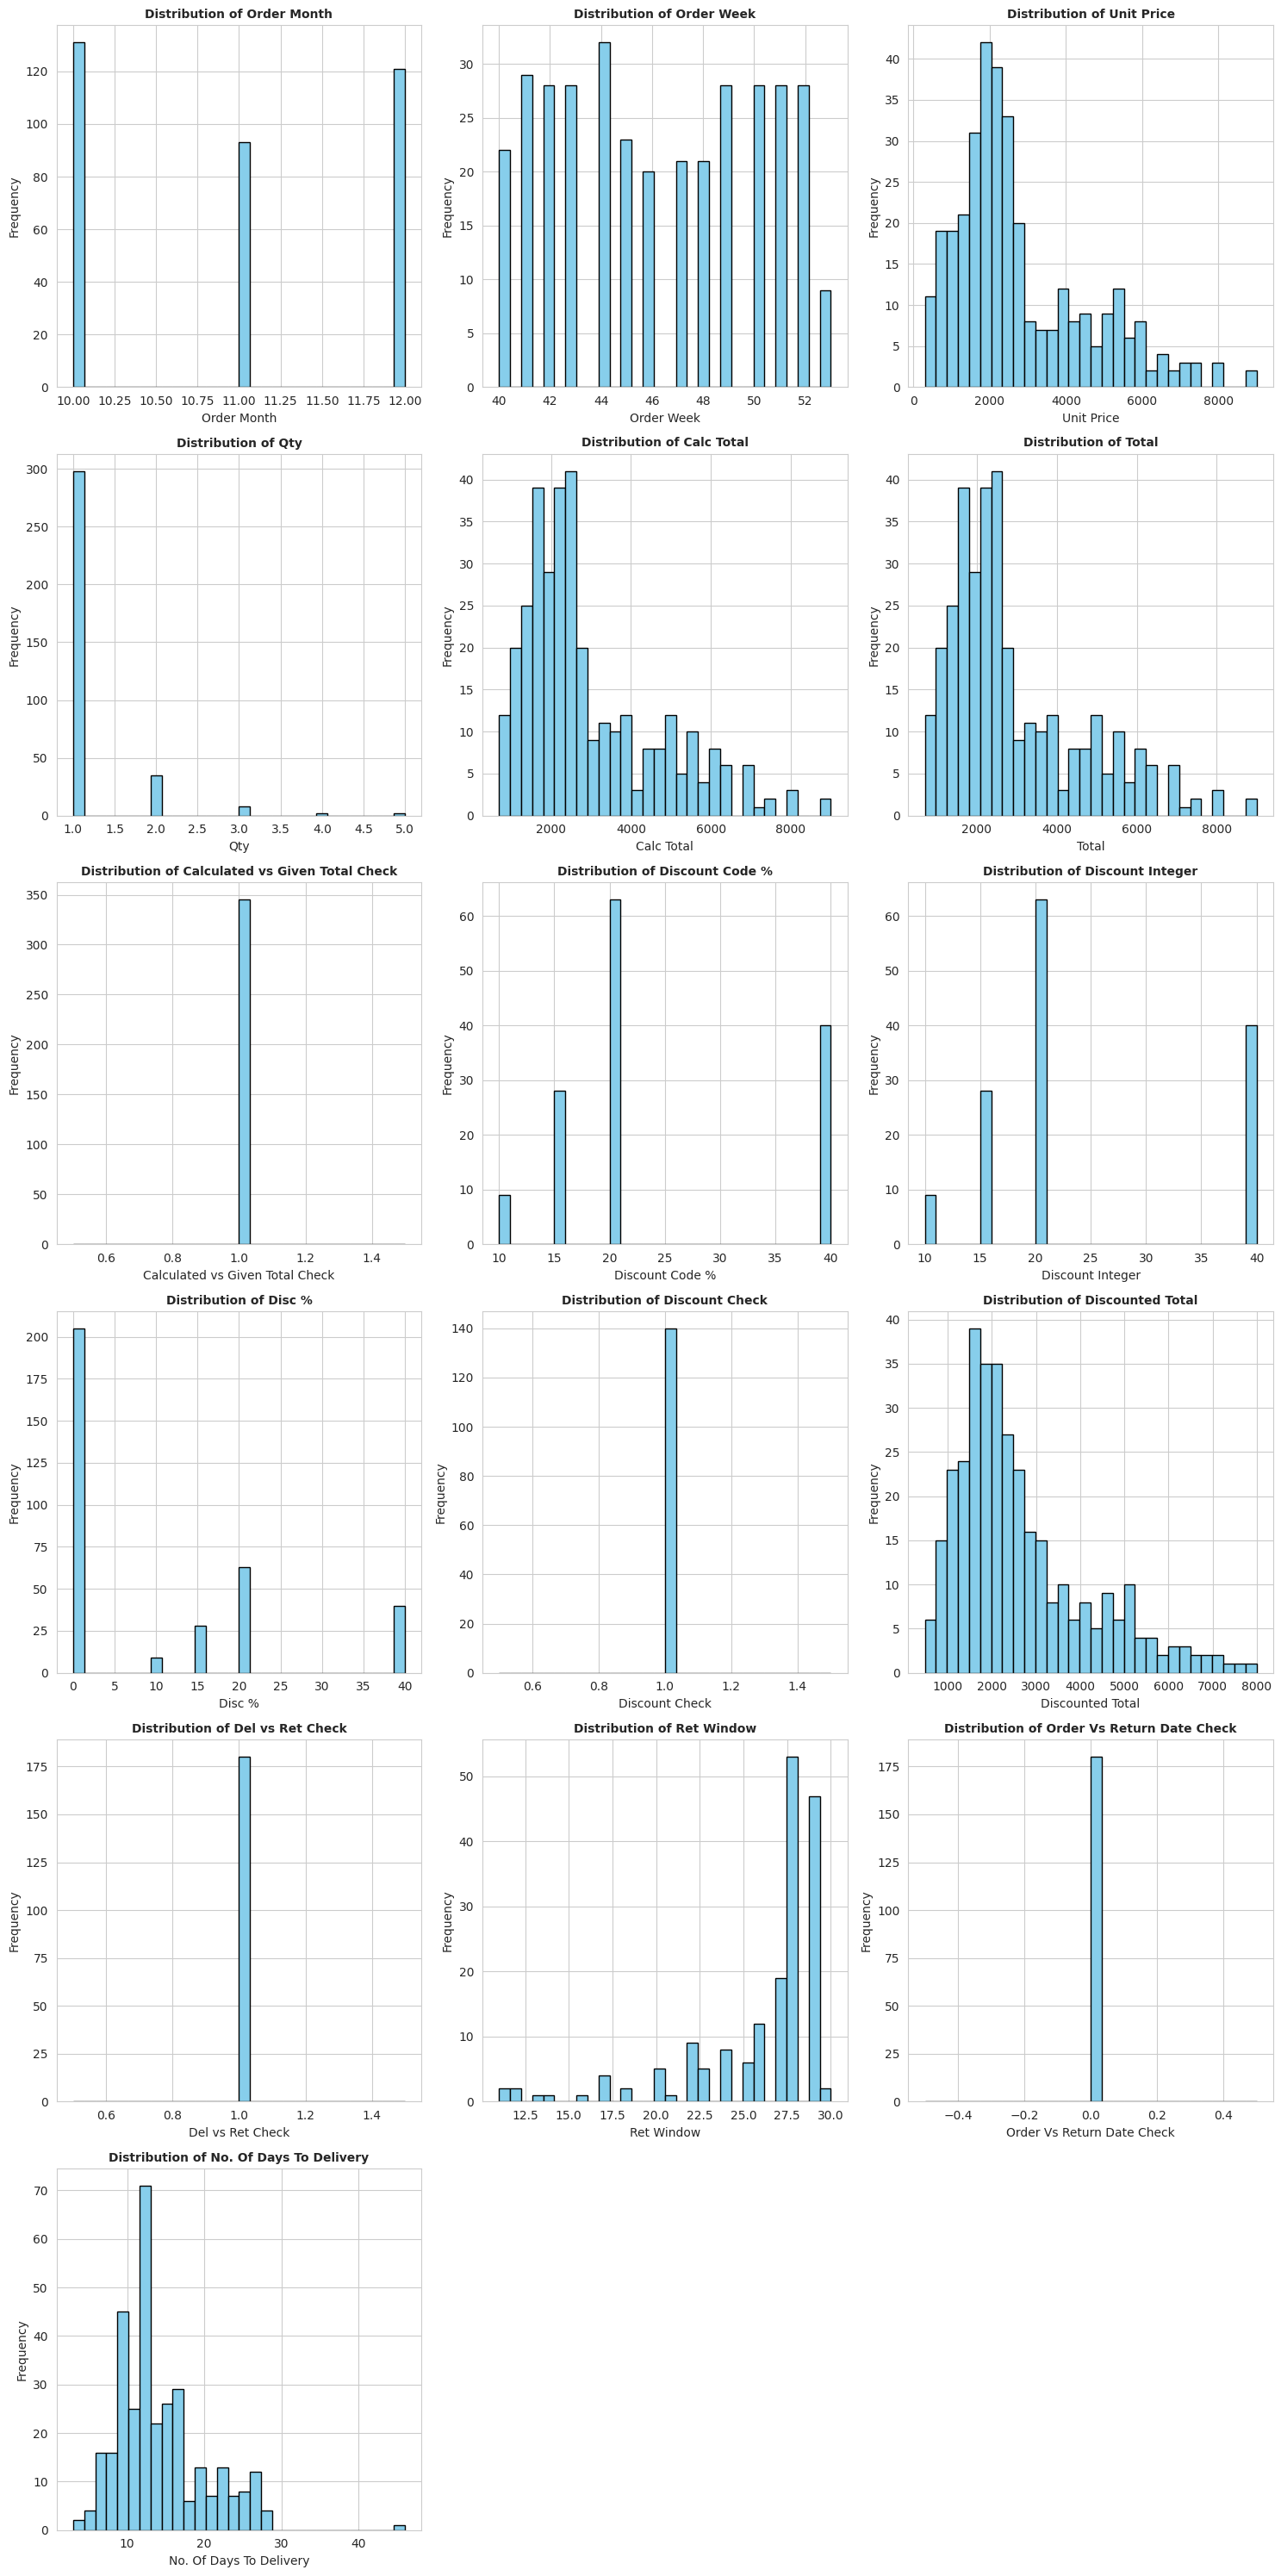

In [102]:
# Distribution of numerical features (Histograms)
n_cols = len(numerical_cols)
n_rows = (n_cols + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_cols > 1 else [axes]

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        df[col].hist(bins=30, ax=axes[idx], edgecolor='black', color='skyblue')
        axes[idx].set_title(f'Distribution of {col}', fontsize=10, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')

# Hide empty subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

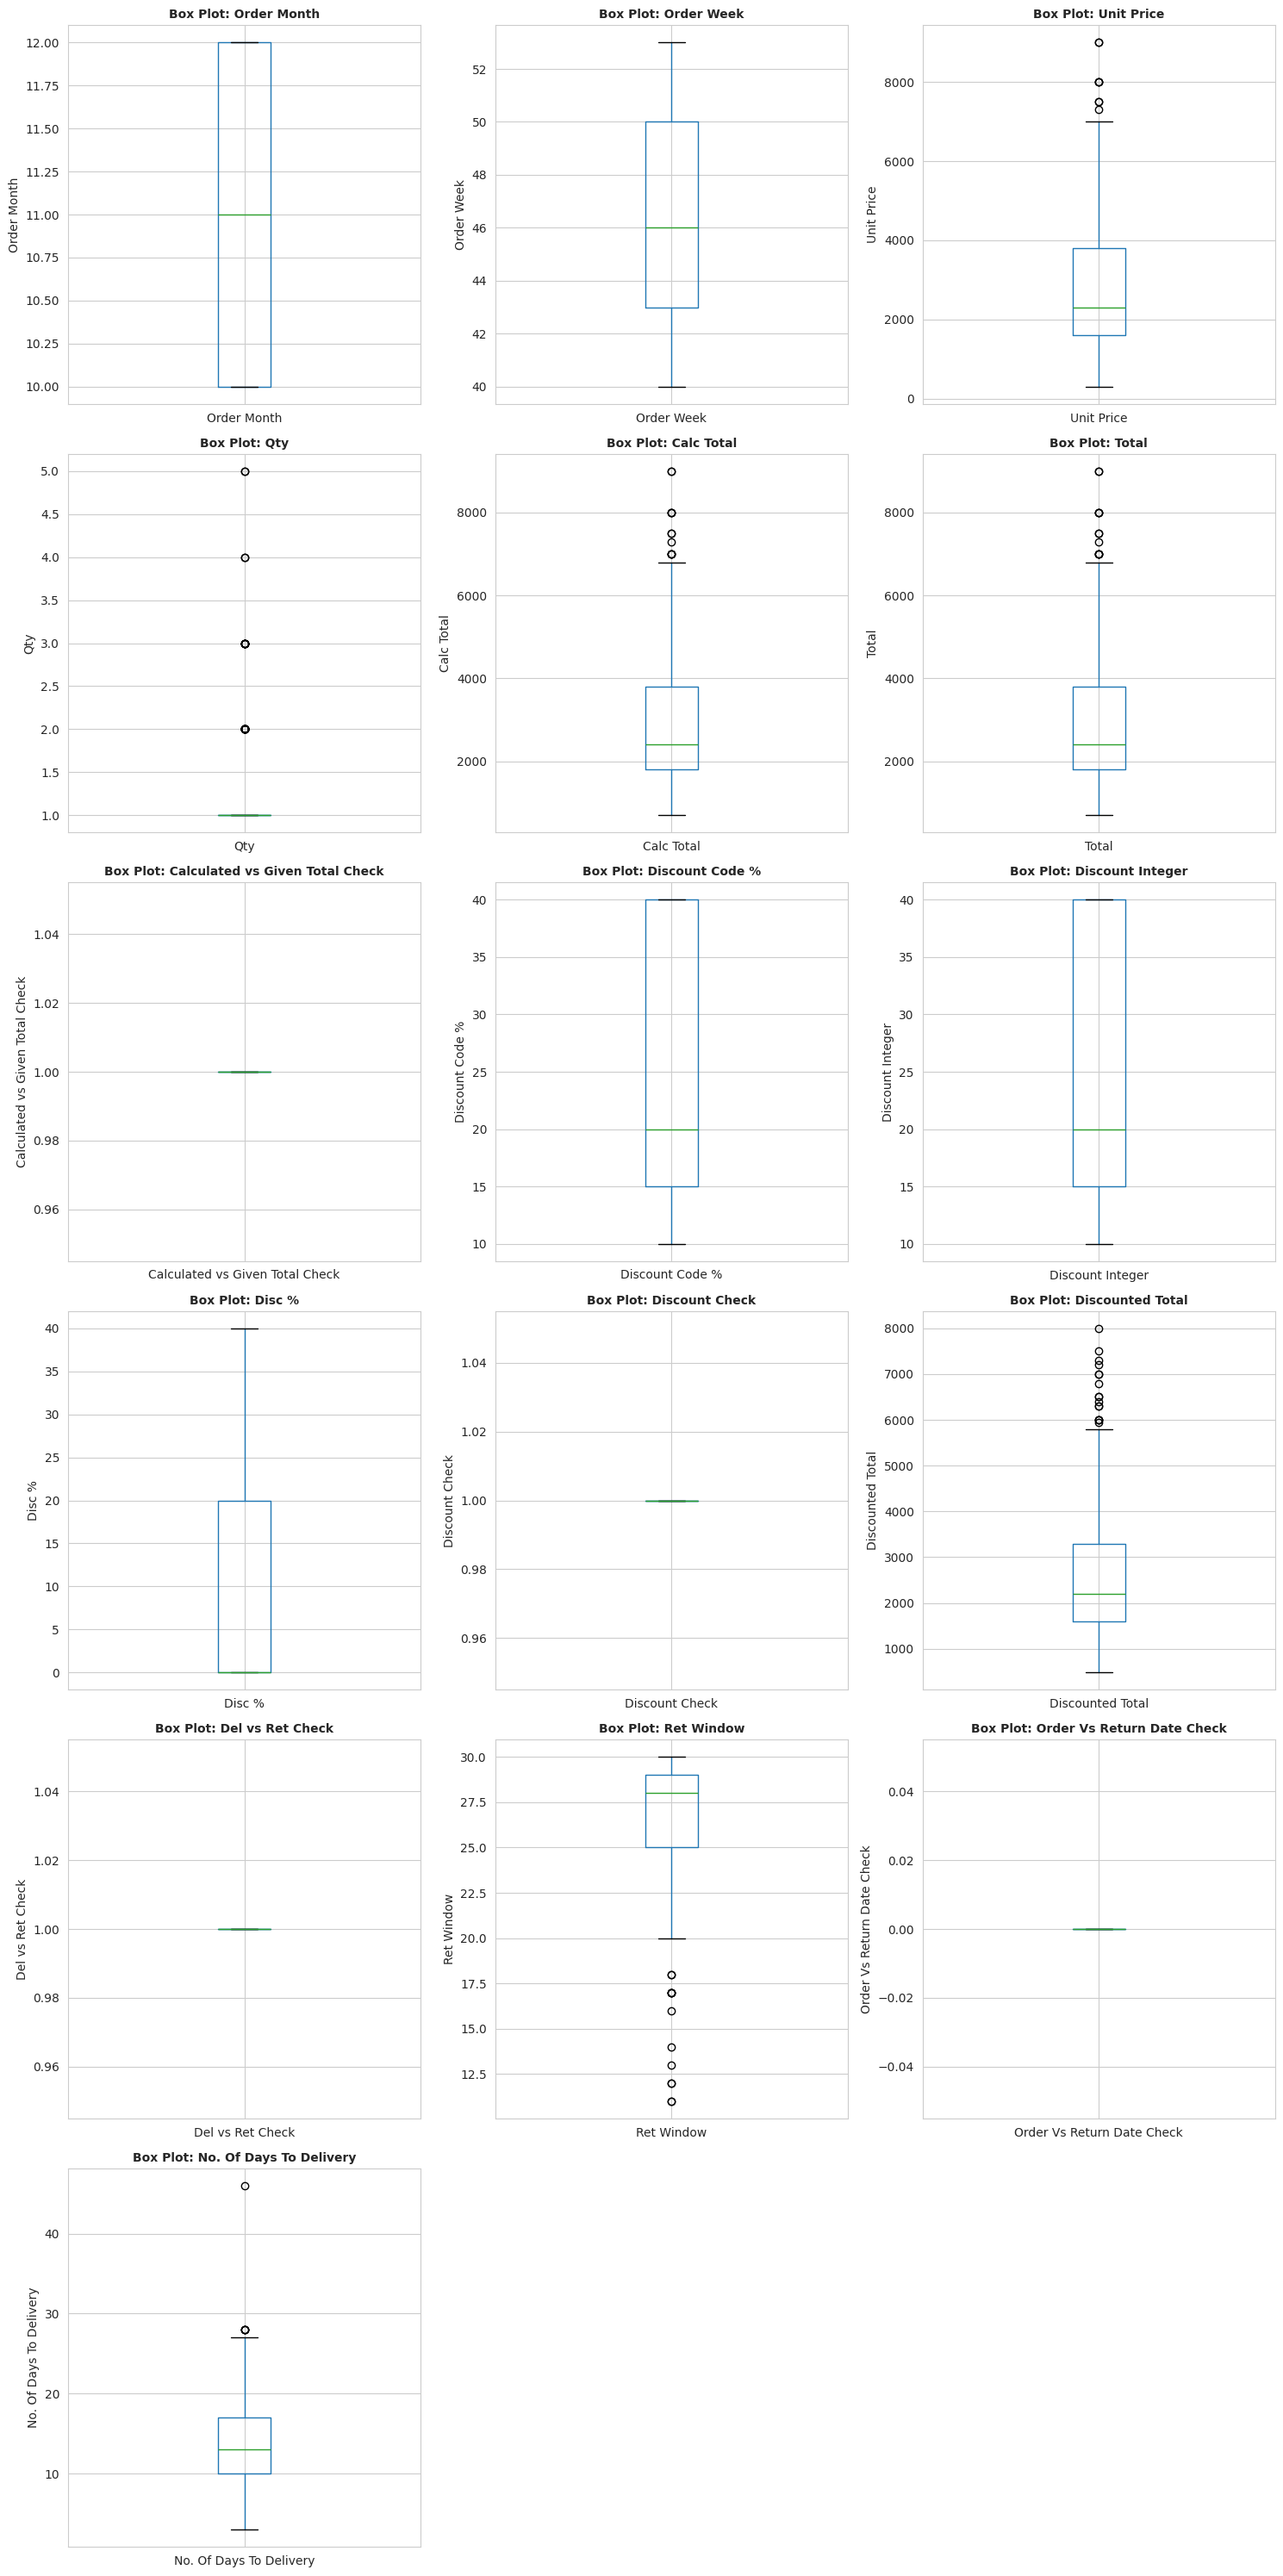

In [103]:
# Box plots to identify outliers
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_cols > 1 else [axes]

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        df.boxplot(column=col, ax=axes[idx])
        axes[idx].set_title(f'Box Plot: {col}', fontsize=10, fontweight='bold')
        axes[idx].set_ylabel(col)

# Hide empty subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

## 7. Correlation Analysis

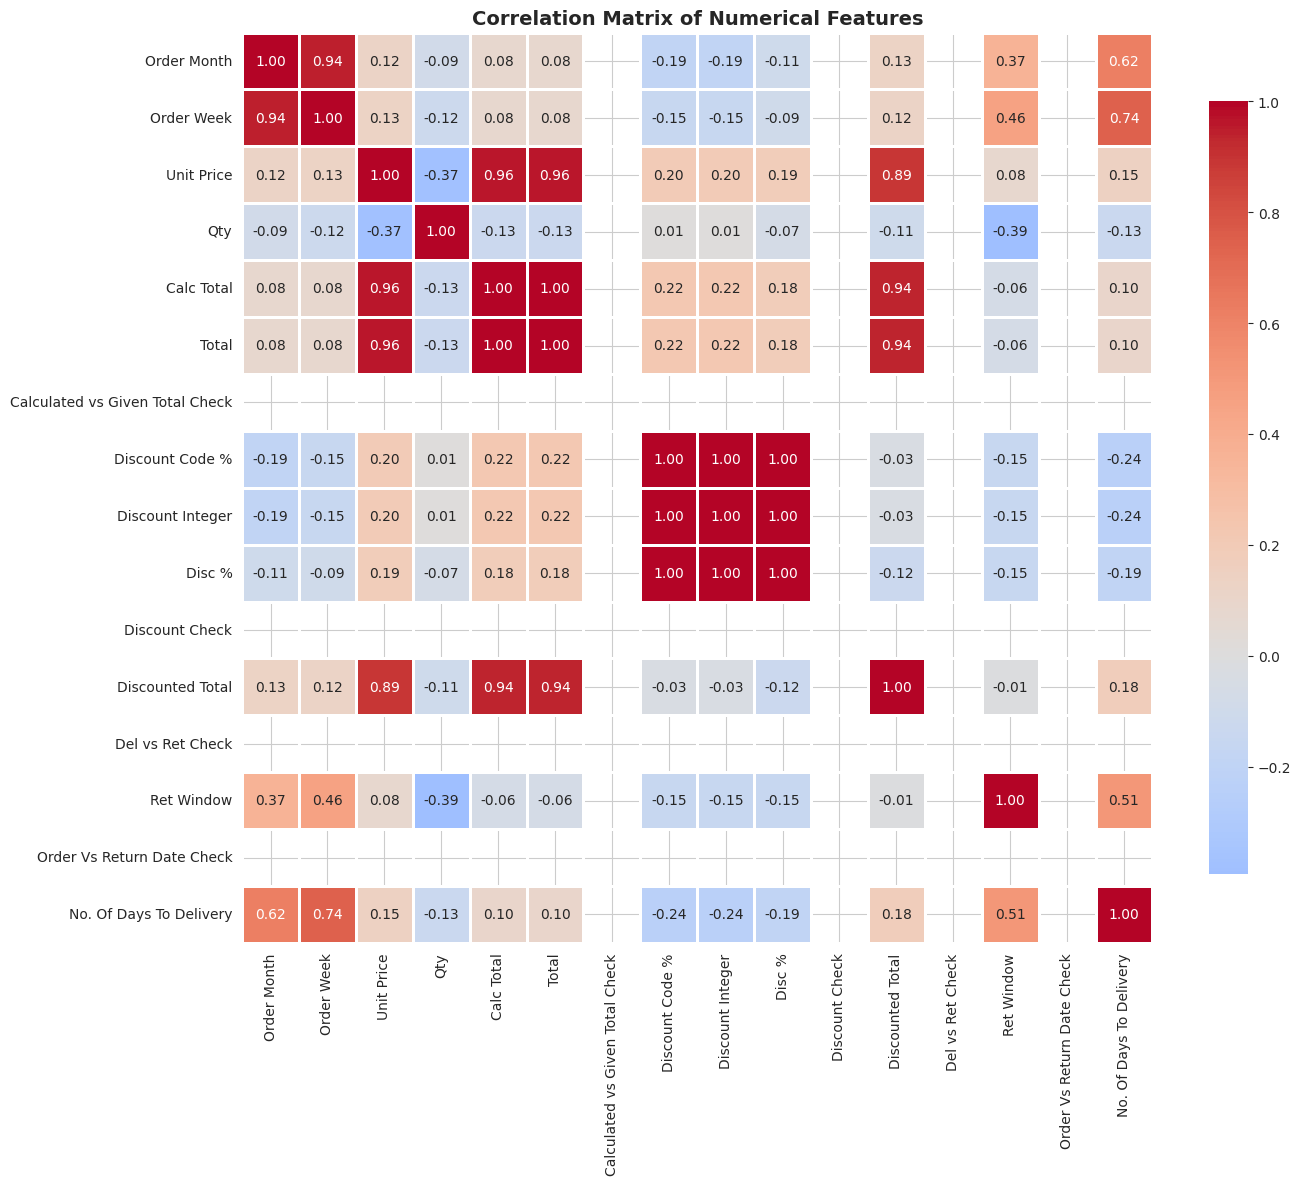

In [104]:
# Correlation matrix
correlation = df[numerical_cols].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [105]:
# Find highly correlated pairs (correlation > 0.7 or < -0.7)
high_corr_pairs = []

for i in range(len(correlation.columns)):
    for j in range(i+1, len(correlation.columns)):
        if abs(correlation.iloc[i, j]) > 0.7:
            high_corr_pairs.append({
                'Feature 1': correlation.columns[i],
                'Feature 2': correlation.columns[j],
                'Correlation': round(correlation.iloc[i, j], 3)
            })

if high_corr_pairs:
    print("Highly correlated feature pairs (|correlation| > 0.7):")
    pd.DataFrame(high_corr_pairs)
else:
    print("No highly correlated pairs found.")

Highly correlated feature pairs (|correlation| > 0.7):


## 8. Categorical Features Analysis

In [106]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Categorical columns ({len(categorical_cols)}):")
for col in categorical_cols:
    print(f"  • {col}")

Categorical columns (21):
  • Order ID
  • Order Check
  • Order Date
  • Customer ID
  • Type
  • SKU
  • Category
  • Product Name
  • Discount Code
  • Payment
  • Source
  • City
  • State
  • Warehouse
  • Del Date
  • Status
  • Return?
  • Reason
  • Ret Rec
  • Refund
  • Comments


In [107]:
# Unique values count
print("Unique values count per categorical column:")
for col in categorical_cols:
    print(f"  {col}: {df[col].nunique()} unique values")

Unique values count per categorical column:
  Order ID: 345 unique values
  Order Check: 1 unique values
  Order Date: 92 unique values
  Customer ID: 343 unique values
  Type: 2 unique values
  SKU: 335 unique values
  Category: 5 unique values
  Product Name: 334 unique values
  Discount Code: 6 unique values
  Payment: 5 unique values
  Source: 3 unique values
  City: 39 unique values
  State: 22 unique values
  Warehouse: 3 unique values
  Del Date: 116 unique values
  Status: 3 unique values
  Return?: 2 unique values
  Reason: 5 unique values
  Ret Rec: 105 unique values
  Refund: 3 unique values
  Comments: 3 unique values


In [108]:
# Value counts for each categorical column (top 10 values)
for col in categorical_cols:
    if df[col].nunique() < 50:  # Only for columns with reasonable number of categories
        print(f"\n{'='*60}")
        print(f"{col} - Value Counts:")
        print('='*60)
        print(df[col].value_counts().head(10))


Order Check - Value Counts:
Order Check
UT    345
Name: count, dtype: int64

Type - Value Counts:
Type
New          269
Returning     76
Name: count, dtype: int64

Category - Value Counts:
Category
Tops           73
Dresses        70
Accessories    68
Outerwear      68
Bottoms        66
Name: count, dtype: int64

Discount Code - Value Counts:
Discount Code
2026-12-20 00:00:00    45
DIWALI40               40
2026-11-15 00:00:00    19
DIWALI20               18
FIRST15                 9
FLAT10                  9
Name: count, dtype: int64

Payment - Value Counts:
Payment
Credit Card    88
UPI            82
COD            62
Debit Card     61
Wallet         52
Name: count, dtype: int64

Source - Value Counts:
Source
Website           120
Mobile App        116
Instagram Shop    109
Name: count, dtype: int64

City - Value Counts:
City
Mumbai        27
Delhi         26
Surat         13
Bangalore     13
Chandigarh    13
Lucknow       13
Jaipur        13
Ahmedabad     12
Kolkata       12
Pune  

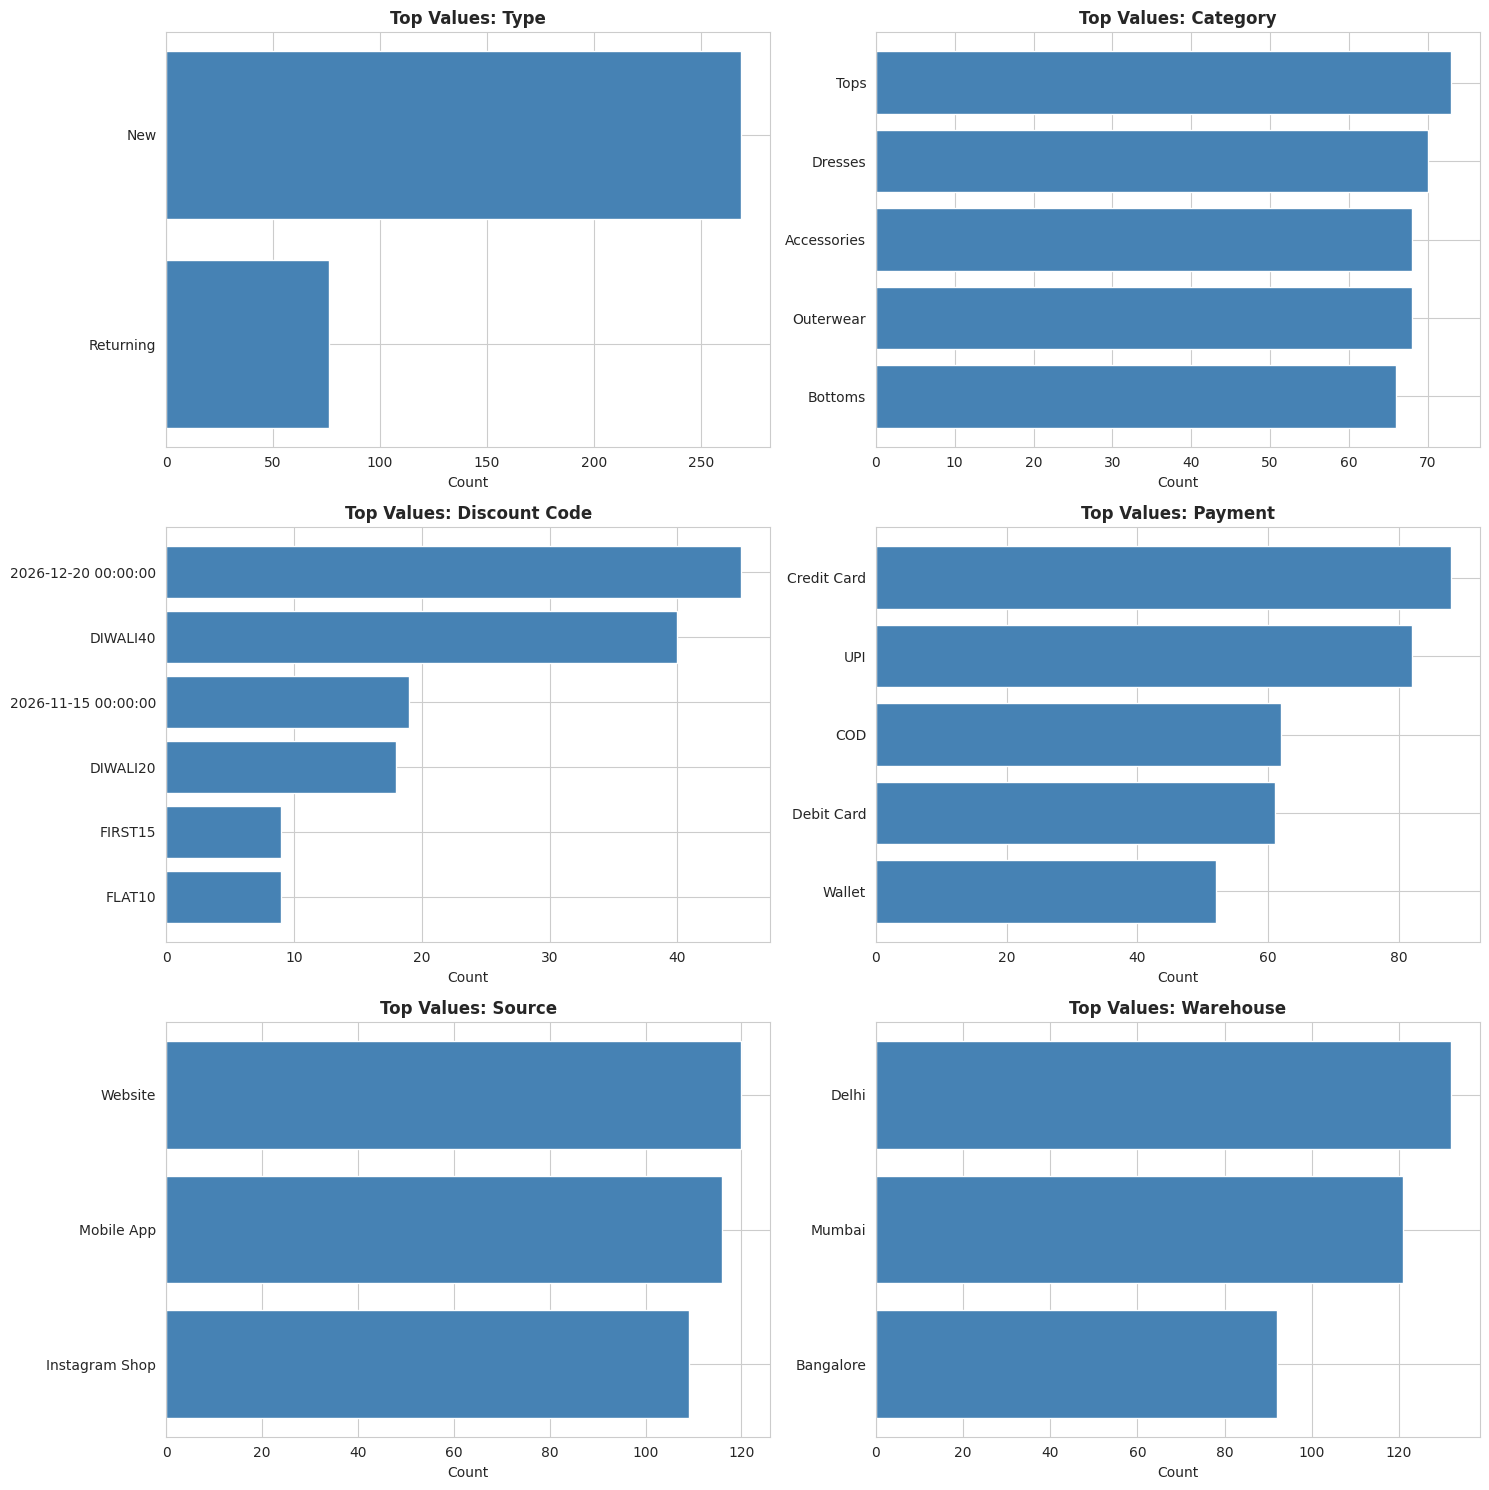

In [109]:
# Visualize categorical distributions (for columns with 2-20 unique values)
cols_to_plot = [col for col in categorical_cols if 2 <= df[col].nunique() <= 20]

if len(cols_to_plot) > 0:
    n_cols_plot = min(len(cols_to_plot), 6)
    n_rows = (n_cols_plot + 1) // 2
    
    fig, axes = plt.subplots(n_rows, 2, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_cols_plot > 1 else [axes]
    
    for idx, col in enumerate(cols_to_plot[:n_cols_plot]):
        value_counts = df[col].value_counts().head(10)
        axes[idx].barh(range(len(value_counts)), value_counts.values, color='steelblue')
        axes[idx].set_yticks(range(len(value_counts)))
        axes[idx].set_yticklabels(value_counts.index)
        axes[idx].set_xlabel('Count')
        axes[idx].set_title(f'Top Values: {col}', fontweight='bold')
        axes[idx].invert_yaxis()
    
    # Hide empty subplots
    for idx in range(n_cols_plot, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

## 9. E-Commerce Specific Analysis

### 9.1 Revenue Analysis

In [110]:
# Overall revenue metrics
if 'Discounted Total' in df.columns:
    total_revenue = df['Discounted Total'].sum()
    avg_order_value = df['Discounted Total'].mean()
    median_order_value = df['Discounted Total'].median()
    
    print("REVENUE METRICS")
    print("="*50)
    print(f"Total Revenue: ₹{total_revenue:,.2f}")
    print(f"Average Order Value: ₹{avg_order_value:,.2f}")
    print(f"Median Order Value: ₹{median_order_value:,.2f}")
    print(f"Total Orders: {len(df):,}")

REVENUE METRICS
Total Revenue: ₹907,708.35
Average Order Value: ₹2,631.04
Median Order Value: ₹2,199.00
Total Orders: 345


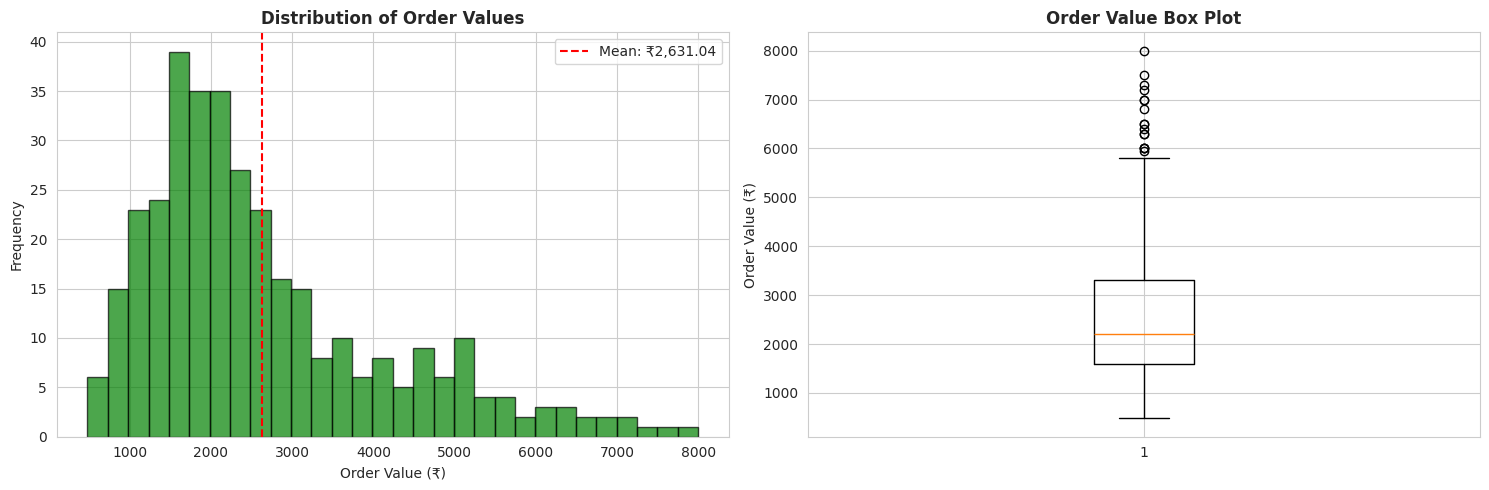

In [111]:
# Revenue distribution
if 'Discounted Total' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Histogram
    axes[0].hist(df['Discounted Total'], bins=30, edgecolor='black', color='green', alpha=0.7)
    axes[0].set_xlabel('Order Value (₹)')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Distribution of Order Values', fontweight='bold')
    axes[0].axvline(avg_order_value, color='red', linestyle='--', label=f'Mean: ₹{avg_order_value:,.2f}')
    axes[0].legend()
    
    # Box plot
    axes[1].boxplot(df['Discounted Total'], vert=True)
    axes[1].set_ylabel('Order Value (₹)')
    axes[1].set_title('Order Value Box Plot', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

### 9.2 Category Analysis

In [112]:
# Revenue by category
if 'Category' in df.columns and 'Discounted Total' in df.columns:
    category_revenue = df.groupby('Category').agg({
        'Discounted Total': ['sum', 'mean', 'count']
    }).round(2)
    
    category_revenue.columns = ['Total_Revenue', 'Avg_Order_Value', 'Order_Count']
    category_revenue = category_revenue.sort_values('Total_Revenue', ascending=False)
    
    print("REVENUE BY CATEGORY")
    print("="*70)
    display(category_revenue)

REVENUE BY CATEGORY


,Total_Revenue,Avg_Order_Value,Order_Count
Category,,,
Outerwear,318739.35,4687.34,68
Dresses,219717.65,3138.82,70
Tops,144548.10,1980.11,73
Bottoms,136825.45,2073.11,66
Accessories,87877.80,1292.32,68


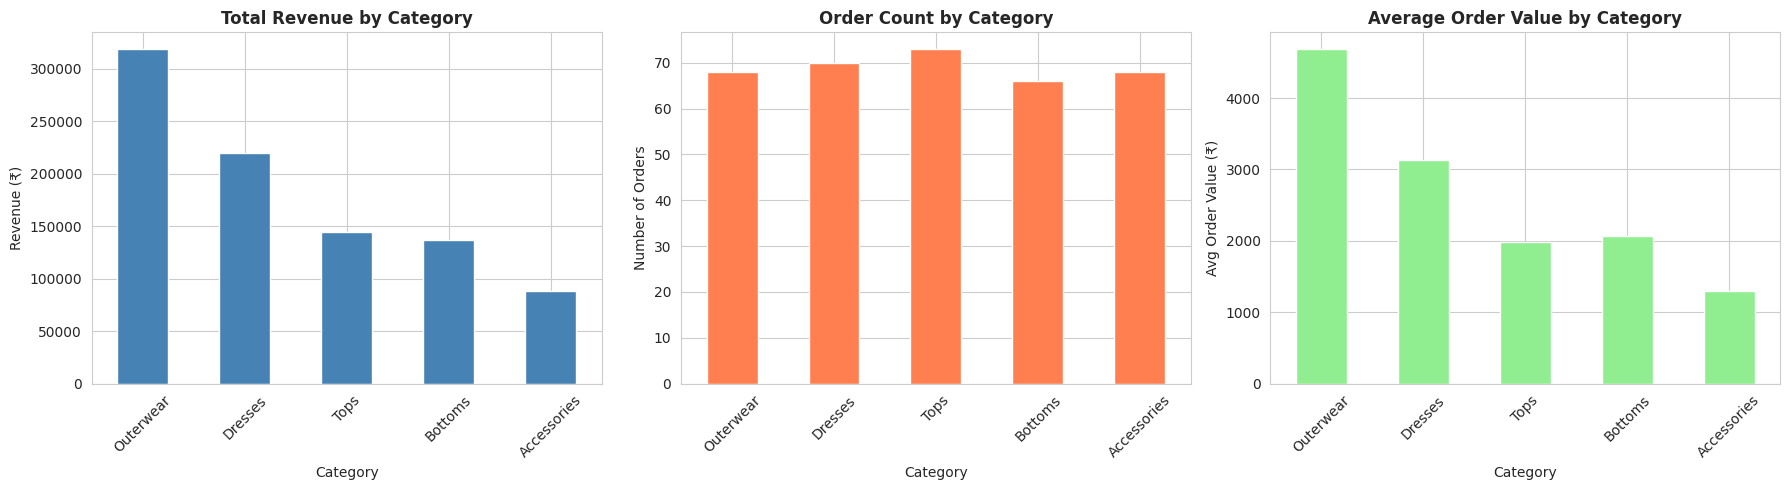

In [113]:
# Visualize category performance
if 'Category' in df.columns and 'Discounted Total' in df.columns:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Total revenue
    category_revenue['Total_Revenue'].plot(kind='bar', ax=axes[0], color='steelblue')
    axes[0].set_title('Total Revenue by Category', fontweight='bold')
    axes[0].set_xlabel('Category')
    axes[0].set_ylabel('Revenue (₹)')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Order count
    category_revenue['Order_Count'].plot(kind='bar', ax=axes[1], color='coral')
    axes[1].set_title('Order Count by Category', fontweight='bold')
    axes[1].set_xlabel('Category')
    axes[1].set_ylabel('Number of Orders')
    axes[1].tick_params(axis='x', rotation=45)
    
    # Average order value
    category_revenue['Avg_Order_Value'].plot(kind='bar', ax=axes[2], color='lightgreen')
    axes[2].set_title('Average Order Value by Category', fontweight='bold')
    axes[2].set_xlabel('Category')
    axes[2].set_ylabel('Avg Order Value (₹)')
    axes[2].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

In [114]:
# Order status distribution
if 'Status' in df.columns:
    print("ORDER STATUS DISTRIBUTION")
    print("="*50)
    status_counts = df['Status'].value_counts()
    print(status_counts)
    print(f"\nDelivery Rate: {(status_counts.get('Delivered', 0) / len(df) * 100):.2f}%")

ORDER STATUS DISTRIBUTION
Status
Delivered    327
RTO           17
Cancelled      1
Name: count, dtype: int64

Delivery Rate: 94.78%


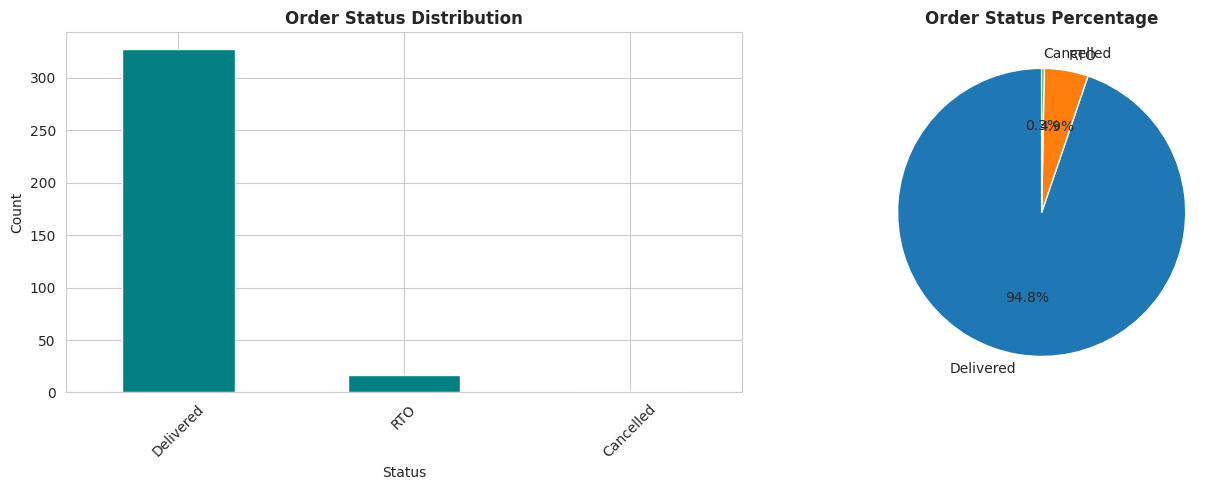

In [115]:
# Visualize order status
if 'Status' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Bar chart
    status_counts.plot(kind='bar', ax=axes[0], color='teal')
    axes[0].set_title('Order Status Distribution', fontweight='bold')
    axes[0].set_xlabel('Status')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Pie chart
    axes[1].pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
    axes[1].set_title('Order Status Percentage', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

### 9.4 Return Analysis

In [116]:
# Return rate
if 'Return?' in df.columns:
    return_counts = df['Return?'].value_counts()
    return_rate = (return_counts.get('Yes', 0) / len(df)) * 100
    
    print("RETURN ANALYSIS")
    print("="*50)
    print(f"Total Returns: {return_counts.get('Yes', 0)}")
    print(f"No Returns: {return_counts.get('No', 0)}")
    print(f"Return Rate: {return_rate:.2f}%")

RETURN ANALYSIS
Total Returns: 180
No Returns: 165
Return Rate: 52.17%


In [117]:
# Return reasons
if 'Return?' in df.columns and 'Reason' in df.columns:
    print("\nRETURN REASONS")
    print("="*50)
    return_reasons = df[df['Return?'] == 'Yes']['Reason'].value_counts()
    display(return_reasons)


RETURN REASONS


Reason
Size Issue            67
Quality Defect        32
Changed Mind          29
Wrong Item            28
Damaged in Transit    24
Name: count, dtype: int64

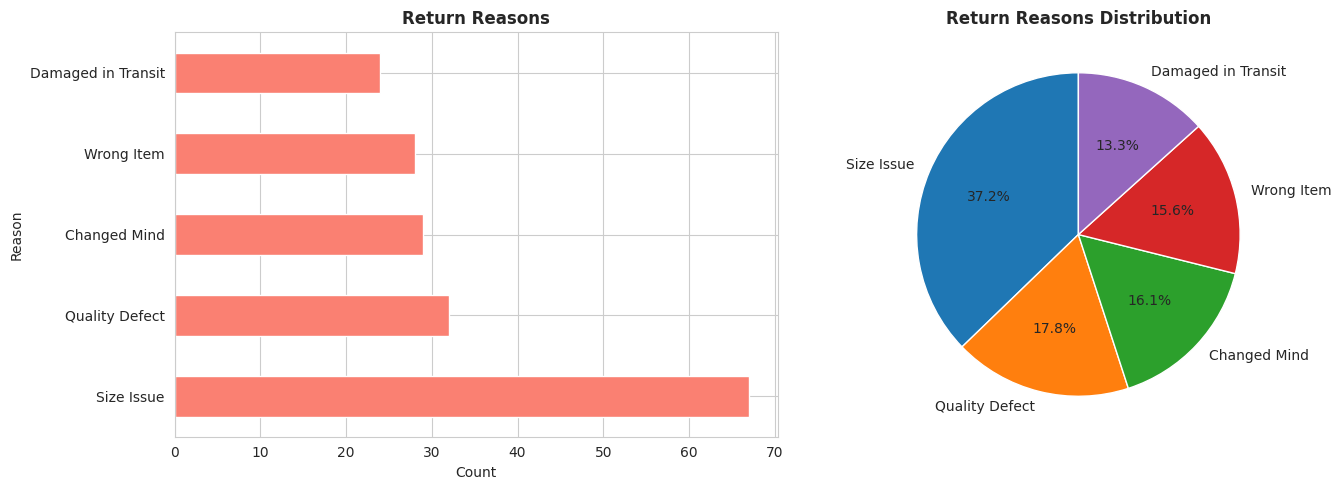

In [118]:
# Visualize return reasons
if 'Return?' in df.columns and 'Reason' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Bar chart
    return_reasons.plot(kind='barh', ax=axes[0], color='salmon')
    axes[0].set_title('Return Reasons', fontweight='bold')
    axes[0].set_xlabel('Count')
    axes[0].set_ylabel('Reason')
    
    # Pie chart
    axes[1].pie(return_reasons.values, labels=return_reasons.index, autopct='%1.1f%%', startangle=90)
    axes[1].set_title('Return Reasons Distribution', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

### 9.5 Geographic Analysis

In [119]:
# Top states by revenue
if 'State' in df.columns and 'Discounted Total' in df.columns:
    state_revenue = df.groupby('State').agg({
        'Discounted Total': ['sum', 'mean', 'count']
    }).round(2)
    
    state_revenue.columns = ['Total_Revenue', 'Avg_Order_Value', 'Order_Count']
    state_revenue = state_revenue.sort_values('Total_Revenue', ascending=False)
    
    print("TOP 10 STATES BY REVENUE")
    print("="*70)
    display(state_revenue.head(10))

TOP 10 STATES BY REVENUE


,Total_Revenue,Avg_Order_Value,Order_Count
State,,,
Maharashtra,128423.90,2568.48,50
Gujarat,123919.25,2693.90,46
Uttar Pradesh,94467.50,2624.10,36
Delhi,68667.65,2641.06,26
Karnataka,63144.30,2745.40,23
Kerala,57814.25,2513.66,23
Tamil Nadu,55260.00,2302.50,24
Madhya Pradesh,52196.60,2372.57,22
Rajasthan,45604.60,3508.05,13


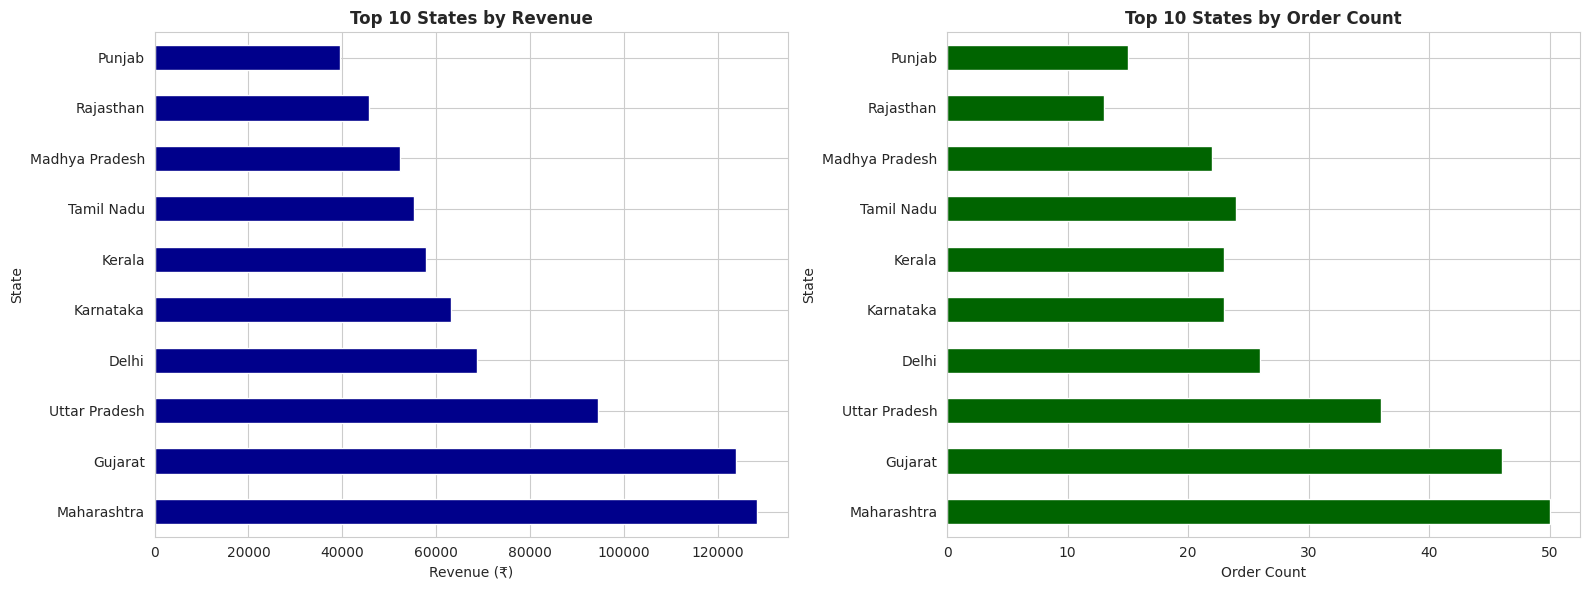

In [120]:
# Visualize top states
if 'State' in df.columns and 'Discounted Total' in df.columns:
    top_10_states = state_revenue.head(10)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Revenue
    top_10_states['Total_Revenue'].plot(kind='barh', ax=axes[0], color='darkblue')
    axes[0].set_title('Top 10 States by Revenue', fontweight='bold')
    axes[0].set_xlabel('Revenue (₹)')
    axes[0].set_ylabel('State')
    
    # Order count
    top_10_states['Order_Count'].plot(kind='barh', ax=axes[1], color='darkgreen')
    axes[1].set_title('Top 10 States by Order Count', fontweight='bold')
    axes[1].set_xlabel('Order Count')
    axes[1].set_ylabel('State')
    
    plt.tight_layout()
    plt.show()

### 9.6 Payment Method Analysis

In [121]:
# Payment method distribution
if 'Payment' in df.columns:
    print("PAYMENT METHOD DISTRIBUTION")
    print("="*50)
    payment_counts = df['Payment'].value_counts()
    display(payment_counts)

PAYMENT METHOD DISTRIBUTION


Payment
Credit Card    88
UPI            82
COD            62
Debit Card     61
Wallet         52
Name: count, dtype: int64

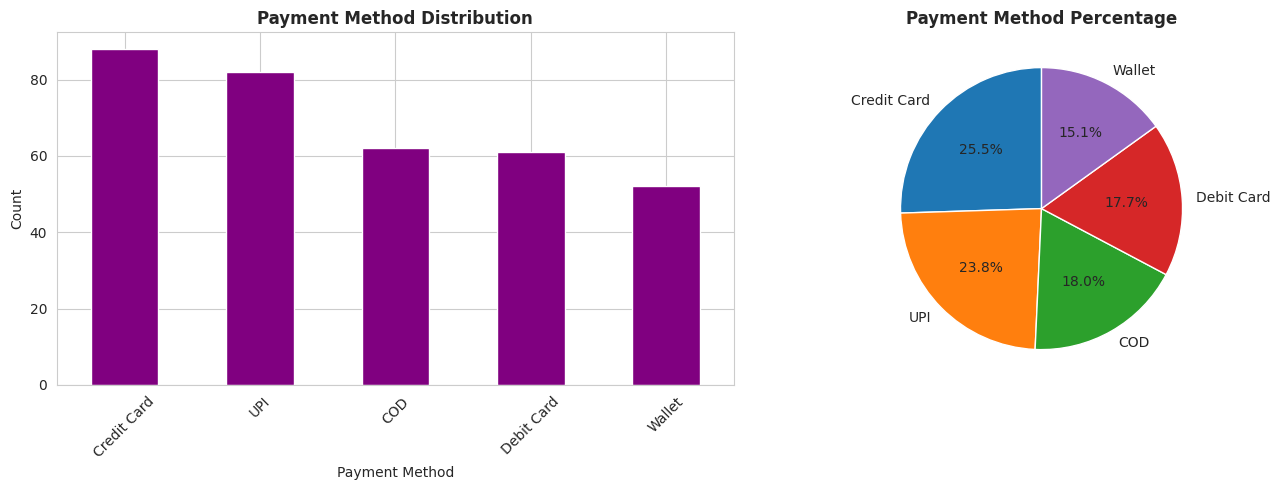

In [122]:
# Visualize payment methods
if 'Payment' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Bar chart
    payment_counts.plot(kind='bar', ax=axes[0], color='purple')
    axes[0].set_title('Payment Method Distribution', fontweight='bold')
    axes[0].set_xlabel('Payment Method')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Pie chart
    axes[1].pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%', startangle=90)
    axes[1].set_title('Payment Method Percentage', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

### 9.7 Source Analysis (Channel)

In [123]:
# Source/channel distribution
if 'Source' in df.columns:
    print("SOURCE/CHANNEL DISTRIBUTION")
    print("="*50)
    source_counts = df['Source'].value_counts()
    display(source_counts)

SOURCE/CHANNEL DISTRIBUTION


Source
Website           120
Mobile App        116
Instagram Shop    109
Name: count, dtype: int64

In [124]:
# Revenue by source
if 'Source' in df.columns and 'Discounted Total' in df.columns:
    source_revenue = df.groupby('Source').agg({
        'Discounted Total': ['sum', 'mean', 'count']
    }).round(2)
    
    source_revenue.columns = ['Total_Revenue', 'Avg_Order_Value', 'Order_Count']
    source_revenue = source_revenue.sort_values('Total_Revenue', ascending=False)
    
    print("\nREVENUE BY SOURCE")
    print("="*70)
    display(source_revenue)


REVENUE BY SOURCE


,Total_Revenue,Avg_Order_Value,Order_Count
Source,,,
Website,308070.75,2567.26,120
Instagram Shop,302772.55,2777.73,109
Mobile App,296865.05,2559.18,116


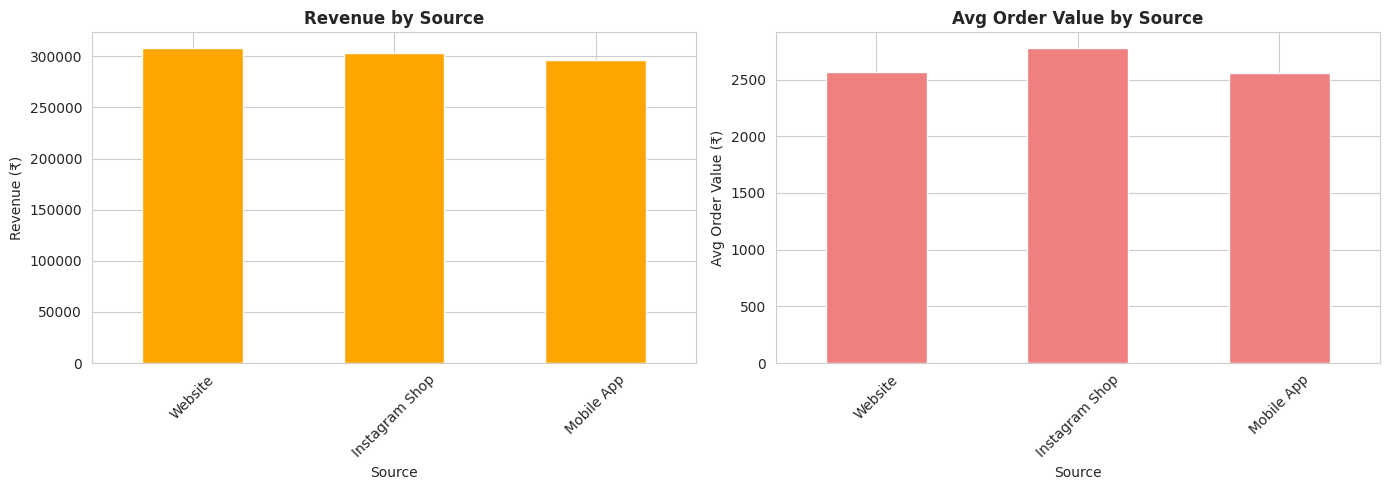

In [125]:
# Visualize source performance
if 'Source' in df.columns and 'Discounted Total' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Revenue by source
    source_revenue['Total_Revenue'].plot(kind='bar', ax=axes[0], color='orange')
    axes[0].set_title('Revenue by Source', fontweight='bold')
    axes[0].set_xlabel('Source')
    axes[0].set_ylabel('Revenue (₹)')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Average order value by source
    source_revenue['Avg_Order_Value'].plot(kind='bar', ax=axes[1], color='lightcoral')
    axes[1].set_title('Avg Order Value by Source', fontweight='bold')
    axes[1].set_xlabel('Source')
    axes[1].set_ylabel('Avg Order Value (₹)')
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

## 10. Outlier Detection

In [126]:
# Detect outliers using IQR method
print("OUTLIER DETECTION (IQR Method)")
print("="*70)

outlier_summary = []

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    
    if outlier_count > 0:
        outlier_summary.append({
            'Column': col,
            'Outlier_Count': outlier_count,
            'Outlier_%': round(outlier_percentage, 2),
            'Lower_Bound': round(lower_bound, 2),
            'Upper_Bound': round(upper_bound, 2)
        })

if outlier_summary:
    outlier_df = pd.DataFrame(outlier_summary)
    display(outlier_df)
else:
    print("✓ No significant outliers detected!")

OUTLIER DETECTION (IQR Method)


,Column,Outlier_Count,Outlier_%,Lower_Bound,Upper_Bound
0,Unit Price,8,2.32,-1701.0,7099.0
1,Qty,47,13.62,1.0,1.0
2,Calc Total,12,3.48,-1201.0,6799.0
3,Total,12,3.48,-1201.0,6799.0
4,Discounted Total,16,4.64,-951.0,5849.0
5,Ret Window,13,3.77,19.0,35.0
6,No. Of Days To Delivery,5,1.45,-0.5,27.5


## 11. Data Quality Report

In [127]:
# Comprehensive data quality report
quality_report = []

for col in df.columns:
    missing_count = df[col].isnull().sum()
    missing_pct = (missing_count / len(df)) * 100
    unique_count = df[col].nunique()
    dtype = df[col].dtype
    
    quality_report.append({
        'Column': col,
        'Data_Type': str(dtype),
        'Missing_Count': missing_count,
        'Missing_%': round(missing_pct, 2),
        'Unique_Values': unique_count,
        'Completeness_%': round(100 - missing_pct, 2)
    })

quality_df = pd.DataFrame(quality_report)

print("DATA QUALITY REPORT")
print("="*100)
display(quality_df)

DATA QUALITY REPORT


,Column,Data_Type,Missing_Count,Missing_%,Unique_Values,Completeness_%
0,Order ID,object,0,0.00,345,100.00
1,Order Check,object,0,0.00,1,100.00
2,Order Date,object,0,0.00,92,100.00
3,Order Month,int64,0,0.00,3,100.00
4,Order Week,int64,0,0.00,14,100.00
5,Customer ID,object,0,0.00,343,100.00
6,Type,object,0,0.00,2,100.00
7,SKU,object,0,0.00,335,100.00
8,Category,object,0,0.00,5,100.00
9,Product Name,object,0,0.00,334,100.00


## 12. Key Insights Summary

In [128]:
# Generate automated insights
print("KEY INSIGHTS SUMMARY")
print("="*70)

print(f"\n📊 DATASET OVERVIEW:")
print(f"  • Total Records: {len(df):,}")
print(f"  • Total Features: {len(df.columns)}")
print(f"  • Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

if 'Discounted Total' in df.columns:
    print(f"\n💰 REVENUE INSIGHTS:")
    print(f"  • Total Revenue: ₹{df['Discounted Total'].sum():,.2f}")
    print(f"  • Average Order Value: ₹{df['Discounted Total'].mean():,.2f}")
    print(f"  • Median Order Value: ₹{df['Discounted Total'].median():,.2f}")

if 'Return?' in df.columns:
    return_rate = (df['Return?'] == 'Yes').sum() / len(df) * 100
    print(f"\n🔄 RETURN INSIGHTS:")
    print(f"  • Return Rate: {return_rate:.2f}%")
    if return_rate > 30:
        print(f"  ⚠️  Warning: High return rate detected!")

if 'Category' in df.columns and 'Discounted Total' in df.columns:
    top_category = df.groupby('Category')['Discounted Total'].sum().idxmax()
    top_category_revenue = df.groupby('Category')['Discounted Total'].sum().max()
    print(f"\n📦 CATEGORY INSIGHTS:")
    print(f"  • Top Category: {top_category} (₹{top_category_revenue:,.2f})")

if 'State' in df.columns and 'Discounted Total' in df.columns:
    top_state = df.groupby('State')['Discounted Total'].sum().idxmax()
    top_state_revenue = df.groupby('State')['Discounted Total'].sum().max()
    print(f"\n🌍 GEOGRAPHIC INSIGHTS:")
    print(f"  • Top State: {top_state} (₹{top_state_revenue:,.2f})")

if len(missing_data) > 0:
    print(f"\n⚠️  DATA QUALITY ALERTS:")
    print(f"  • {len(missing_data)} columns have missing values")
    print(f"  • Highest missing percentage: {missing_data['Missing_Percentage'].max():.2f}%")

print("\n✅ Analysis Complete!")

KEY INSIGHTS SUMMARY

📊 DATASET OVERVIEW:
  • Total Records: 345
  • Total Features: 37
  • Memory Usage: 0.42 MB

💰 REVENUE INSIGHTS:
  • Total Revenue: ₹907,708.35
  • Average Order Value: ₹2,631.04
  • Median Order Value: ₹2,199.00

🔄 RETURN INSIGHTS:
  • Return Rate: 52.17%
  ⚠️  Warning: High return rate detected!

📦 CATEGORY INSIGHTS:
  • Top Category: Outerwear (₹318,739.35)

🌍 GEOGRAPHIC INSIGHTS:
  • Top State: Maharashtra (₹128,423.90)

⚠️  DATA QUALITY ALERTS:
  • 12 columns have missing values
  • Highest missing percentage: 98.26%

✅ Analysis Complete!


## 14. Next Steps & Recommendations

Based on the EDA, consider these next steps:

1. **Handle Missing Values**: Decide on imputation or removal strategy for columns with missing data
2. **Address High Return Rate**: Investigate root causes (size issues, quality, etc.)
3. **Feature Engineering**: Create new features like customer lifetime value, purchase frequency
4. **Predictive Modeling**: Build models for return prediction, revenue forecasting
5. **Customer Segmentation**: Use clustering to identify customer groups
6. **Time Series Analysis**: Analyze trends over time if date columns are available
7. **A/B Testing**: Design experiments to optimize conversion and reduce returns